[ 개발 주제 : 꽃잎 너비 예측 모델 ]
- 데이터셋 : iris.csv
 * 피쳐/특성/데이터 : sepal.length, sepal.width, petal.length (다변량)
 * 타겟/정답/레이블 : petal.width 
- 학습종류 : 지도학습 - 회귀
- 알고리즘 : 데이터셋 분석 후 결정 
- 검증 : 5개 교차검증 진행 

In [69]:
# [1-1] 모듈 로딩
from sklearn.linear_model import LinearRegression                                               # 머신러닝 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error     # 성능평가 모듈 
from sklearn.model_selection import train_test_split                                            # 데이터셋 분리 모듈
from sklearn.model_selection import KFold                                                       # 교차검증
import matplotlib.pyplot as plt 
import pandas as pd 

In [70]:
# [1-2] 데이터 준비

# iris 데이터
iris_df = pd.read_csv('iris.csv', usecols=[0,1,2,3])

display(iris_df)

sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

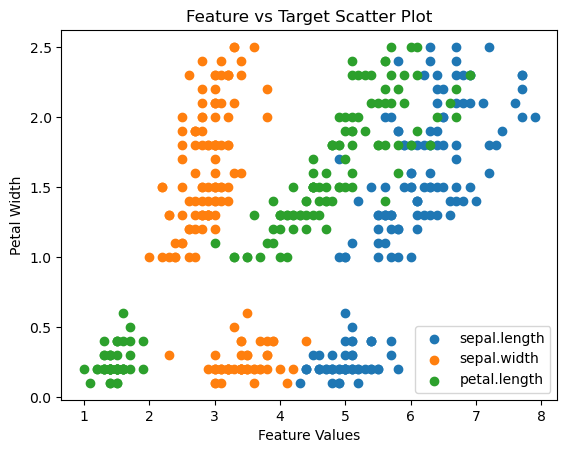

In [71]:
# [1-3] 탐색적 분석 - 시각화 

featureDF = iris_df[['sepal.length', 'sepal.width', 'petal.length']] # 2차원
targetSR = iris_df['petal.width']     # 1차원 

for column in featureDF.columns:
    plt.scatter(featureDF[column], targetSR, label=column)
    
plt.xlabel('Feature Values')
plt.ylabel('Petal Width')
plt.legend()
plt.title('Feature vs Target Scatter Plot')
plt.show()

In [72]:
# [1-4] 탐색적 분석 - 상관계수
iris_df.corr()['petal.width']

sepal.length    0.817941
sepal.width    -0.366126
petal.length    0.962865
petal.width     1.000000
Name: petal.width, dtype: float64

In [ ]:
# [2-1] 데이터셋 준비 => 학습용, 검증용, 테스트용 
# 학습용 : 규칙과 패턴 찾기 위해 사용되는 데이터셋
# 검증용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
# 테스트용 : 학습 완료 후 검사용 데이터셋

# 전체 데이터셋에서 학습용 / 테스트용 분리 (70:30 or 80:20)
featureDF = iris_df[iris_df.columns[:-1:2]] # 2차원
targetSR = iris_df['petal.width']     # 1차원 

In [75]:
# 학습용 : 테스트용 = 70:30 
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=10)

In [76]:
# 교차검증 객체 생성 
kf = KFold()   # 5개 분할 : 기본값

# 선형회귀 모델 객체 생성
lr = LinearRegression()


In [77]:
# 데이터말고 인덱스를 반환 
# 교차검증으로 학습 및 검증 진행
# Train - Test 나누고 train을 K개로 분리 

result_df = pd.DataFrame(columns=['score','rmse'])

for i, (train_index, test_index) in enumerate(kf.split(x_train, y_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

    # 학습용 / 테스트용 피쳐와 타겟 추출
    train_data, train_label = x_train.iloc[train_index], y_train.iloc[train_index]
    test_data, test_label = x_train.iloc[test_index], y_train.iloc[test_index]
        
    # 학습
    lr.fit(train_data, train_label)

    # 성능평가 
    train_score = lr.score(train_data, train_label)
    test_score = lr.score(test_data, test_label)
    
    # 오차계산
    train_rmse = root_mean_squared_error(train_label, lr.predict(train_data))
    test_rmse = root_mean_squared_error(test_label, lr.predict(test_data))
   
    
    result_df.loc[f"Fold {i}_Train"] = [train_score, train_rmse] 
    result_df.loc[f"Fold {i}_Test"] = [test_score, test_rmse] 
    

Fold 0:
  Train: index=[ 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
  Test:  index=[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  

In [78]:
display(result_df)

score      rmse
Fold 0_Train  0.931999  0.196367
Fold 0_Test   0.928567  0.220536
Fold 1_Train  0.927289  0.209445
Fold 1_Test   0.950259  0.163209
Fold 2_Train  0.932802  0.202915
Fold 2_Test   0.926989  0.190864
Fold 3_Train  0.925382  0.211510
Fold 3_Test   0.957729  0.148550
Fold 4_Train  0.947377  0.172440
Fold 4_Test   0.878255  0.286977

In [79]:
# 검증 이후 테스트 수행
# - 테스트 데이터셋 사용

In [80]:
# 테스트 데이터에 대한 예측값 추출
pre_y = lr.predict(x_test)

# 평가
score = lr.score(x_test, y_test)
rmse = root_mean_squared_error(y_test, pre_y)

print(score, rmse)

0.9195639040746975 0.20937779856708708


In [91]:
# 모델 활용 / 서비스
# 사용자로부터 입력받기

print('[ 품종 조회 ]')
new_data = input('입력 : ').split(',')

new_data = [float(data) for data in new_data]
print(new_data)

# 예측결과 출력
data_df =  pd.DataFrame([new_data], columns=['sepal.length','petal.length'])  # 예측결과 데이터 형태는 동일해야한다. 
lr.predict(data_df)


[ 품종 조회 ]
[3.4, 4.5]


array([1.63512906])